In [ ]:
#Let's go
import pandas as pd
import numpy  as np
import MetaTrader5 as mt5
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io, color

In [ ]:
# Load and preprocess the image
image = io.imread('mql5.png')  # Replace with your image path
image_gray = image_gray = color.rgb2gray(image)   # Convert to grayscale

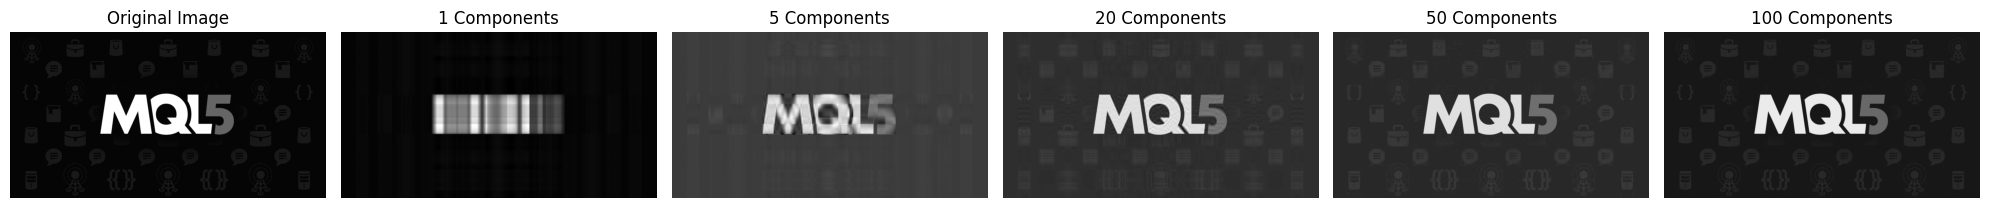

In [ ]:
# Flatten the image
h, w = image_gray.shape
image_flattened = image_gray.reshape(h, w)

# Apply PCA with different numbers of components
n_components_list = [1,5,20,50,100]  # Number of components to keep

fig, axes = plt.subplots(1, len(n_components_list) + 1, figsize=(20, 10))
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

for i, n_components in enumerate(n_components_list):
    # Initialize PCA and transform the flattened image
    pca = PCA(n_components=n_components)
    pca.fit(image_flattened)

    # Transform and inverse transform the image
    transformed_image = pca.transform(image_flattened)
    reconstructed_image = pca.inverse_transform(transformed_image).reshape(h, w)

    # Plot the reconstructed image
    axes[i + 1].imshow(reconstructed_image, cmap='gray')
    axes[i + 1].set_title(f"{n_components} Components")
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
mt5.initialize()

True

In [ ]:
#List of stocks
crypto = [
            "BCHUSD", #BitcoinCash
            "EOSUSD", #EOS
            "BTCUSD", #Bitcoin
            "ETHUSD", #Etherum
            "ADAUSD", #Cardano
            "XRPUSD", #Ripple
            "UNIUSD", #Monero
            "DOGUSD", #Dogecoin
            "LTCUSD", #Litecoin
            "SOLUSD"  #Solana
]

In [ ]:
fetch = 365 * 6

In [ ]:
look_ahead = 30

In [ ]:
data = pd.DataFrame(columns=crypto,index=range(fetch))

In [ ]:
for i in range(0,len(crypto)):
    data[crypto[i]]       = pd.DataFrame(mt5.copy_rates_from_pos(crypto[i],mt5.TIMEFRAME_M1,0,fetch)).loc[:,"close"]

In [ ]:
data

BCHUSD  EOSUSD    BTCUSD   ETHUSD   ADAUSD  XRPUSD  UNIUSD   DOGUSD  \
0     384.38  0.4617  72635.34  2633.55  0.35406  0.5227  7.8970  0.17612   
1     384.37  0.4616  72626.22  2633.27  0.35413  0.5226  7.8938  0.17611   
2     384.36  0.4616  72656.30  2634.56  0.35419  0.5226  7.8934  0.17622   
3     385.27  0.4618  72731.65  2636.23  0.35413  0.5227  7.8972  0.17597   
4     384.98  0.4619  72753.64  2636.49  0.35413  0.5228  7.8961  0.17564   
...      ...     ...       ...      ...      ...     ...     ...      ...   
2185  371.19  0.4462  72063.27  2629.76  0.35688  0.5131  7.8391  0.16920   
2186  370.85  0.4462  72054.43  2629.13  0.35630  0.5127  7.8290  0.16895   
2187  370.98  0.4460  72027.25  2628.09  0.35629  0.5128  7.8283  0.16898   
2188  371.09  0.4459  72073.95  2630.41  0.35647  0.5130  7.8354  0.16939   
2189  371.38  0.4467  72082.72  2631.30  0.35699  0.5133  7.8420  0.16957   

      LTCUSD    SOLUSD  
0      73.39  178.8035  
1      73.38  178.8345  
2      73.45  179.0935  
3      73.51  179.1135  
4      73.53  179.1035  
...      ...       ...  
2185   70.67  174.2345  
2186   70.65  174.2699  
2187   70.65  174.1299  
2188   70.65  174.2699  
2189   70.71  174.3129  

[2190 rows x 10 columns]

<Axes: >

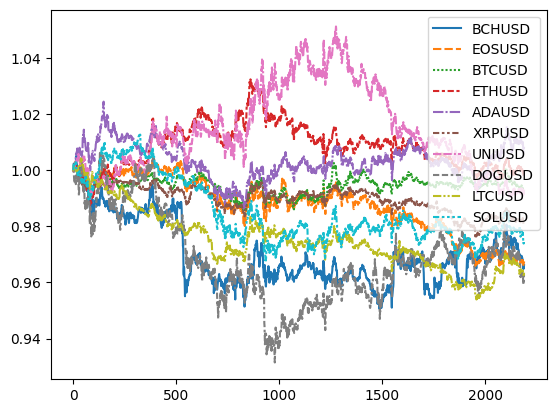

In [ ]:
data_plotting = data.iloc[:,:]/data.iloc[0,:]
sns.lineplot(data_plotting)

Text(0, 0.5, 'Standard Deviation')

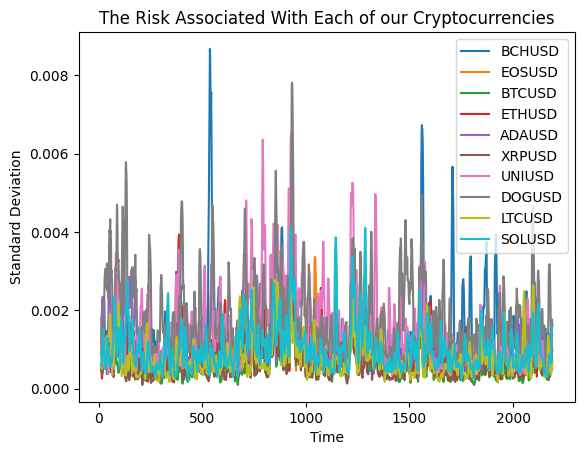

In [ ]:
plt.plot(data_plotting.iloc[:,0].rolling(14).std())
plt.plot(data_plotting.iloc[:,1].rolling(14).std())
plt.plot(data_plotting.iloc[:,2].rolling(14).std())
plt.plot(data_plotting.iloc[:,3].rolling(14).std())
plt.plot(data_plotting.iloc[:,4].rolling(14).std())
plt.plot(data_plotting.iloc[:,5].rolling(14).std())
plt.plot(data_plotting.iloc[:,6].rolling(14).std())
plt.plot(data_plotting.iloc[:,7].rolling(14).std())
plt.plot(data_plotting.iloc[:,8].rolling(14).std())
plt.plot(data_plotting.iloc[:,9].rolling(14).std())
plt.legend(crypto)
plt.title("The Risk Associated With Each of our Cryptocurrencies")
plt.xlabel("Time")
plt.ylabel("Standard Deviation")

<Axes: >

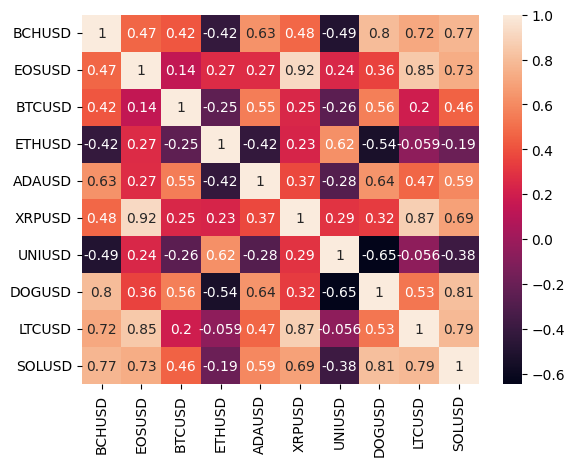

In [ ]:
#Correlation analysis
sns.heatmap(data.corr(),annot=True)

In [ ]:
#Calculate the change over 2 weeks
data = data.diff(14).dropna().reset_index(drop=True)

In [ ]:
data

BCHUSD  EOSUSD  BTCUSD  ETHUSD   ADAUSD  XRPUSD  UNIUSD   DOGUSD  \
0      -1.09 -0.0004  -38.96    3.75 -0.00008 -0.0008 -0.0381  0.00056   
1      -1.15 -0.0003  -58.05    1.23  0.00003 -0.0008 -0.0082  0.00032   
2      -1.06  0.0004  -89.20    1.06 -0.00019 -0.0008 -0.0070  0.00039   
3      -1.32  0.0001 -165.41   -4.24 -0.00054 -0.0008 -0.0105 -0.00039   
4      -1.12 -0.0010 -148.67   -5.16 -0.00091 -0.0008 -0.0182 -0.00066   
...      ...     ...     ...     ...      ...     ...     ...      ...   
2171   -1.31 -0.0006  -32.94    0.03  0.00089  0.0003 -0.0015  0.00010   
2172   -1.03 -0.0006  -32.11   -0.21  0.00057  0.0005 -0.0025  0.00003   
2173   -0.56 -0.0004  -57.19   -1.40  0.00032  0.0002 -0.0072 -0.00002   
2174   -0.08 -0.0001  -83.29   -2.58  0.00020 -0.0003 -0.0074  0.00021   
2175    0.70 -0.0003  -56.70   -1.87  0.00057 -0.0001 -0.0014  0.00044   

      LTCUSD  SOLUSD  
0       0.04  0.1381  
1       0.02  0.0582  
2       0.04 -0.0178  
3      -0.02 -0.1116  
4       0.01 -0.2157  
...      ...     ...  
2171   -0.09 -0.0390  
2172   -0.07  0.0780  
2173   -0.07 -0.0920  
2174    0.02 -0.1039  
2175    0.05 -0.0429  

[2176 rows x 10 columns]

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [ ]:
scaled_data

BCHUSD    EOSUSD    BTCUSD    ETHUSD    ADAUSD    XRPUSD    UNIUSD  \
0    -0.677419 -0.230769 -0.210475  0.485112 -0.050847 -0.777778 -0.990411   
1    -0.716129 -0.153846 -0.338010  0.172457  0.042373 -0.777778 -0.171233   
2    -0.658065  0.384615 -0.546114  0.151365 -0.144068 -0.777778 -0.138356   
3    -0.825806  0.153846 -1.055249 -0.506203 -0.440678 -0.777778 -0.234247   
4    -0.696774 -0.692308 -0.943415 -0.620347 -0.754237 -0.777778 -0.445205   
...        ...       ...       ...       ...       ...       ...       ...   
2171 -0.819355 -0.384615 -0.170258  0.023573  0.771186  0.444444  0.012329   
2172 -0.638710 -0.384615 -0.164713 -0.006203  0.500000  0.666667 -0.015068   
2173 -0.335484 -0.230769 -0.332264 -0.153846  0.288136  0.333333 -0.143836   
2174 -0.025806  0.000000 -0.506631 -0.300248  0.186441 -0.222222 -0.149315   
2175  0.477419 -0.153846 -0.328991 -0.212159  0.500000  0.000000  0.015068   

        DOGUSD  LTCUSD    SOLUSD  
0     0.529126  0.4375  0.233362  
1     0.296117  0.3125  0.102470  
2     0.364078  0.4375 -0.022034  
3    -0.393204  0.0625 -0.175697  
4    -0.655340  0.2500 -0.346234  
...        ...     ...       ...  
2171  0.082524 -0.3750 -0.056764  
2172  0.014563 -0.2500  0.134906  
2173 -0.033981 -0.2500 -0.143588  
2174  0.189320  0.3125 -0.163083  
2175  0.412621  0.5000 -0.063153  

[2176 rows x 10 columns]

In [ ]:
pca = PCA()
pca.fit(scaled_data)

In [ ]:
#High risk strategy
pca.components_[0]

array([-0.31760842, -0.32146743, -0.35867192, -0.35797826, -0.28276975,
       -0.36658864, -0.2954465 , -0.19875535, -0.32278201, -0.30604428])

In [ ]:
np.savetxt("HIGH RISK COMPONENTS.txt",pca.components_[0])

In [ ]:
#High risk asset allocations can be estimated from the first principal component
high_risk_asset_allocation = pca.components_[0] / np.linalg.norm(pca.components_[0],1)
np.sum(high_risk_asset_allocation * 100)

-100.0

In [ ]:
high_risk_asset_allocation * 10

array([-1.01533565, -1.02767219, -1.1466081 , -1.14439061, -0.90396285,
       -1.17191639, -0.94448806, -0.63538425, -1.03187466, -0.97836721])

In [ ]:
high_risk_asset_allocation  = high_risk_asset_allocation * 10
np.savetxt("HIGH RISK ASSET ALLOCATION.txt",high_risk_asset_allocation)

In [ ]:
#Mid risk strategy
pca.components_[len(crypto)//2]

array([-0.00530455,  0.16374242,  0.03976866, -0.19508115,  0.75650629,
        0.08559565, -0.51882352, -0.15840483, -0.23524968,  0.06543203])

In [ ]:
#Medium risk asset allocations can be estimated from the mid principal component
medium_risk_asset_allocation = pca.components_[len(crypto)//2] / np.linalg.norm(pca.components_[len(crypto)//2],1)
#10 Positions
medium_risk_asset_allocation * 10

array([-0.02385238,  0.7362821 ,  0.17882323, -0.87719941,  3.4016966 ,
        0.3848883 , -2.33293526, -0.71228114, -1.05782074,  0.29422083])

In [ ]:
np.savetxt("MID RISK COMPONENTS.txt",pca.components_[len(crypto)//2])

In [ ]:
#Low risk strategy
pca.components_[len(crypto)-1]

array([-0.03520096,  0.37157999, -0.41562007,  0.74700647, -0.06764155,
       -0.15451366, -0.28321595, -0.01342945, -0.09973515, -0.10555529])

In [ ]:
#Low risk asset allocations can be estimated from the last principal component
low_risk_asset_allocation = pca.components_[len(crypto)-1] / np.linalg.norm(pca.components_[len(crypto)-1],1)
#10 Positions
low_risk_asset_allocation * 10

array([-0.15348148,  1.62014489, -1.81216626,  3.25706102, -0.29492737,
       -0.67370291, -1.23486432, -0.05855443, -0.43486032, -0.46023699])

In [ ]:
np.savetxt("LOW RISK COMPONENTS.txt",pca.components_[len(crypto)-1])

In [ ]:
crypto

['BCHUSD',
 'EOSUSD',
 'BTCUSD',
 'ETHUSD',
 'ADAUSD',
 'XRPUSD',
 'UNIUSD',
 'DOGUSD',
 'LTCUSD',
 'SOLUSD']